In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from drawdata import draw_scatter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
x=pd.read_csv('4_class_classification.csv').iloc[:,1:]
y=x.pop('z').values
y=LabelEncoder().fit_transform(y.reshape(-1,1))
x=x.values
x[:,1]*=1000
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y)
print(x_train.shape)
print(y_train.shape)

(289, 2)
(289,)


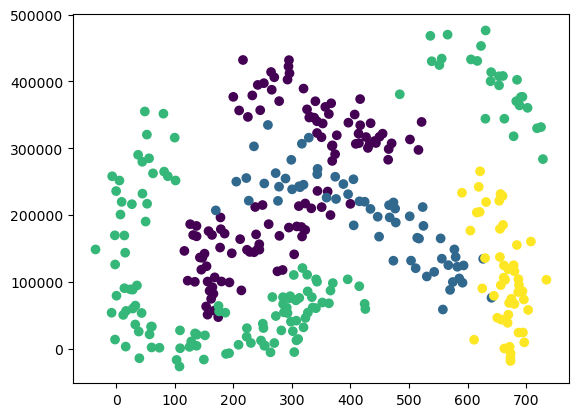

In [3]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [120]:
model=RandomForestClassifier(n_estimators=10)
params={'min_samples_leaf':[1,2,3],
       'class_weight':['balanced']
       }
cls=GridSearchCV(model,params,cv=5,scoring='f1_macro',verbose=10,refit=True)
cls.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START class_weight=balanced, min_samples_leaf=1...................
[CV 1/5; 1/3] END class_weight=balanced, min_samples_leaf=1;, score=0.925 total time=   0.0s
[CV 2/5; 1/3] START class_weight=balanced, min_samples_leaf=1...................
[CV 2/5; 1/3] END class_weight=balanced, min_samples_leaf=1;, score=0.988 total time=   0.0s
[CV 3/5; 1/3] START class_weight=balanced, min_samples_leaf=1...................
[CV 3/5; 1/3] END class_weight=balanced, min_samples_leaf=1;, score=0.825 total time=   0.0s
[CV 4/5; 1/3] START class_weight=balanced, min_samples_leaf=1...................
[CV 4/5; 1/3] END class_weight=balanced, min_samples_leaf=1;, score=0.981 total time=   0.0s
[CV 5/5; 1/3] START class_weight=balanced, min_samples_leaf=1...................
[CV 5/5; 1/3] END class_weight=balanced, min_samples_leaf=1;, score=0.871 total time=   0.0s
[CV 1/5; 2/3] START class_weight=balanced, min_samples_leaf=2.........

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'class_weight': ['balanced'],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='f1_macro', verbose=10)

In [121]:
y_pred=cls.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[21  2  0  0]
 [ 0 12  0  0]
 [ 5  0 23  0]
 [ 0  1  0  9]]


In [122]:
model=KNeighborsClassifier()
params={'weights':['uniform','distance'],
       'n_neighbors': range(10)}
cls=GridSearchCV(model,params,cv=5,verbose=10,scoring='f1_macro')
cls.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 1/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 2/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 3/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 4/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 5/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 2/20] START n_neighbors=0, weights=distance............................
[CV 1/5; 2/20] END n_neighbors=0, weights=dista

[CV 3/5; 16/20] END n_neighbors=7, weights=distance;, score=0.466 total time=   0.0s
[CV 4/5; 16/20] START n_neighbors=7, weights=distance...........................
[CV 4/5; 16/20] END n_neighbors=7, weights=distance;, score=0.418 total time=   0.0s
[CV 5/5; 16/20] START n_neighbors=7, weights=distance...........................
[CV 5/5; 16/20] END n_neighbors=7, weights=distance;, score=0.374 total time=   0.0s
[CV 1/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 1/5; 17/20] END n_neighbors=8, weights=uniform;, score=0.380 total time=   0.0s
[CV 2/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 2/5; 17/20] END n_neighbors=8, weights=uniform;, score=0.436 total time=   0.0s
[CV 3/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 3/5; 17/20] END n_neighbors=8, weights=uniform;, score=0.501 total time=   0.0s
[CV 4/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 4/5

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(0, 10),
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro', verbose=10)

In [123]:
y_pred=cls.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(cls.score(x_test,y_test))

[[14  4  5  0]
 [ 2  4  4  2]
 [ 5  2 18  3]
 [ 1  3  4  2]]
0.4469214578486762


In [124]:
prep=StandardScaler().fit(x_train)
x_train=prep.transform(x_train)
x_test=prep.transform(x_test)
cls.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 1/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 2/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 3/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 4/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 1/20] START n_neighbors=0, weights=uniform.............................
[CV 5/5; 1/20] END n_neighbors=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 2/20] START n_neighbors=0, weights=distance............................
[CV 1/5; 2/20] END n_neighbors=0, weights=dista

[CV 4/5; 16/20] END n_neighbors=7, weights=distance;, score=0.981 total time=   0.0s
[CV 5/5; 16/20] START n_neighbors=7, weights=distance...........................
[CV 5/5; 16/20] END n_neighbors=7, weights=distance;, score=0.893 total time=   0.0s
[CV 1/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 1/5; 17/20] END n_neighbors=8, weights=uniform;, score=0.946 total time=   0.0s
[CV 2/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 2/5; 17/20] END n_neighbors=8, weights=uniform;, score=0.967 total time=   0.0s
[CV 3/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 3/5; 17/20] END n_neighbors=8, weights=uniform;, score=0.883 total time=   0.0s
[CV 4/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 4/5; 17/20] END n_neighbors=8, weights=uniform;, score=0.949 total time=   0.0s
[CV 5/5; 17/20] START n_neighbors=8, weights=uniform............................
[CV 5/5;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(0, 10),
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro', verbose=10)

In [125]:
y_pred=cls.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(cls.score(x_test,y_test))

[[22  1  0  0]
 [ 0 12  0  0]
 [ 2  0 26  0]
 [ 0  1  0  9]]
0.9423946299646189
